In [6]:
import numpy as np
from __future__ import division
import numpy.testing as test
import random
import scipy
from scipy import integrate
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

[<__main__.Particle instance at 0x00000000169B9E88>, <__main__.Particle instance at 0x0000000003B44C88>, <__main__.Particle instance at 0x00000000126F1A88>, <__main__.Particle instance at 0x00000000126F1508>, <__main__.Particle instance at 0x00000000126F1AC8>, <__main__.Particle instance at 0x00000000126F14C8>]
0.58713343333
(-1004.8492924128323, -318.2027331460489, -853.17126142276697)
(-287.06037792438696, -686.14999652594929, -1133.663127168649)
(-717.78891448826266, 367.9472633798041, 280.49186574580682)
0.497402636398
(-843.26398199960886, 220.42911023624458, -624.03610515001867)
(-849.68938696778844, -629.8586476343055, -545.33054411012847)
(6.4254049681755987, 850.28775787031827, -78.705561039870304)
('Ks', 0.93877405905831957, -287.06037811259364, -686.149996975813, -1133.6631279119179)
('pi+', 0.98690624229395207, -717.78892981116758, 367.94727123451014, 280.49187173357018)
('Ks', 0.92258587610109133, -849.68938720926019, -629.85864781330395, -545.33054426510512)
('pi-', 0.986

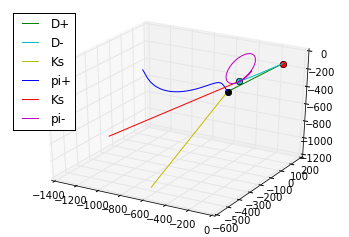

Particle: D+, Mass: 1869.61 GeV/c**2, Charge: 1, Lifetime: 1040.0 fs, Energy: 2309.61421744 MeV, Momentum: 1356.05172515 MeV/c
Particle: D-, Mass: 1869.61 GeV/c**2, Charge: -1, Lifetime: 1040.0 fs, Energy: 2155.12081997 MeV, Momentum: 1071.96277761 MeV/c
Particle: Ks, Mass: 497.611 GeV/c**2, Charge: 0, Lifetime: 89540.0 fs, Energy: 1444.30407946 MeV, Momentum: 1355.87520319 MeV/c
Particle: pi+, Mass: 139.57018 GeV/c**2, Charge: 1, Lifetime: 26033000.0 fs, Energy: 865.310156777 MeV, Momentum: 853.979995244 MeV/c
Particle: Ks, Mass: 497.611 GeV/c**2, Charge: 0, Lifetime: 89540.0 fs, Energy: 1289.84343267 MeV, Momentum: 1189.99133336 MeV/c
Particle: pi-, Mass: 139.57018 GeV/c**2, Charge: -1, Lifetime: 26033000.0 fs, Energy: 865.27739914 MeV, Momentum: 853.946802978 MeV/c


'OUTLINE OF WHAT THE PROGRAM MUST DO\n\nGenerate decay chain\nCalculate masses, lifetimes, and momenta of first two particles (either D0 D0_bar or D+ D-)\nCreate first two particles at origin using above calculations\nUse travel function to trace path of first two particles\nCalculate masses, lifetimes of daughter particles\nUse decacy function to create daughter particles\nBoost daughter particles into correct reference frame\nUse travel function to trace their paths\nWhen we reach stable particles / the end of the decay chain print the decay chain,\nand info on all particles\nPrint visualization of their paths\n\n'

In [79]:
def main():
    chain = decaychain()
    print(chain)
    for P in chain:
        if not P.parent():
            #print(i)
            P.set_v([random.uniform(-.5,.5)],[random.uniform(-.5,.5)],[random.uniform(-.5,.5)])
            P.set_pos([0],[0],[0])
            travel(P)
            print(P.v())
            two_body_decay(P,P.daughter(0),P.daughter(1))
            print(P.px()[-1],P.py()[-1],P.pz()[-1])
            print(P.daughter(0).px()[0], P.daughter(0).py()[0], P.daughter(0).pz()[0])
            print(P.daughter(1).px()[0], P.daughter(1).py()[0], P.daughter(1).pz()[0])

        else:
            travel(P)
            print(P.name(), P.v(), P.px()[0], P.py()[0], P.pz()[0])
            
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    for P in chain:
        ax.plot([P.x()[0]],[P.y()[0]],[P.z()[0]],'o')
        ax.plot(P.x(),P.y(),P.z(), label = P.name())
    plt.legend(loc='best')
    plt.show()
    for P in chain:
        print(P)
    
    
main()

'''OUTLINE OF WHAT THE PROGRAM MUST DO

Generate decay chain
Calculate masses, lifetimes, and momenta of first two particles (either D0 D0_bar or D+ D-)
Create first two particles at origin using above calculations
Use travel function to trace path of first two particles
Calculate masses, lifetimes of daughter particles
Use decacy function to create daughter particles
Boost daughter particles into correct reference frame
Use travel function to trace their paths
When we reach stable particles / the end of the decay chain print the decay chain,
and info on all particles
Print visualization of their paths

'''

In [67]:
class Particle:

    def __init__(self,name,m,q,t):
        self.__name = name
        self.__x = None
        self.__y = None
        self.__z = None
        self.__vx = None
        self.__vy = None
        self.__vz = None
        self.__v = None     #np.sqrt(vx[0]**2+vy[0]**2+vz[0]**2)
        self.__m = float(m)
        self.__q = q 
        self.__t = float(t)
        self.__gamma = None    #float(1/np.sqrt(1-(self.__v)**2))
        self.__px = None
        self.__py = None
        self.__pz = None
        '''
        for i in range(len(vx)):
            self.__px.append(self.__gamma * self.__m * self.__vx[i])
            self.__py.append(self.__gamma * self.__m * self.__vy[i])
            self.__pz.append(self.__gamma * self.__m * self.__vz[i])
        '''
        self.__p = None #np.sqrt(self.__px[0]**2+self.__py[0]**2+self.__pz[0]**2)
        self.__e = None #np.sqrt(self.__p**2+self.__m**2)
        self.__daughters = []
        self.__parent = None
        
    def name(self):
        return self.__name
        
    def x(self):
        return self.__x
        
    def y(self):
        return self.__y
        
    def z(self):
        return self.__z
    
    
    def vx(self):
        return self.__vx
        
    def vy(self):
        return self.__vy
        
    def vz(self):
        return self.__vz   
        
    def v(self):
        return self.__v
        
        
    def gamma(self):
        return self.__gamma
    
    def mass(self):
        return self.__m
        
    def charge(self):
        return self.__q
        
    def lifetime(self):
        return self.__t
        
    def px(self):
        return self.__px
        
    def py(self):
        return self.__py
        
    def pz(self):
        return self.__pz
        
    def p(self):
        return self.__p

    def set_p4(self, Px, Py, Pz, E):
        pass

    def set_pos(self, x, y, z):
        self.__x, self.__y, self.__z = x, y, z
    
    '''
    def set_y(self, y):
        self.__y = y
        
    def set_z(self, z):
        self.__z = z
    '''
    
    def set_v(self, vx, vy, vz):
        self.__vx = vx
        self.__vy = vy
        self.__vz = vz
        self.__v = np.sqrt(vx[0]**2+vy[0]**2+vz[0]**2)
        self.__gamma = 1/np.sqrt(1-(self.__v)**2)
        self.__px = []
        self.__py = []
        self.__pz = []
        for i in range(len(vx)):
            self.__px.append(self.__gamma * self.__m * self.__vx[i])
            self.__py.append(self.__gamma * self.__m * self.__vy[i])
            self.__pz.append(self.__gamma * self.__m * self.__vz[i])
        self.__p = np.sqrt(self.__px[0]**2+self.__py[0]**2+self.__pz[0]**2)
        self.__e = np.sqrt(self.__p**2+self.__m**2)
        
    '''    
    def set_vy(self, vy):
        self.__vy = vy
        
    def set_vz(self, vz):
        self.__vz = vz
    '''
    def e(self):
        if self.__p:
            return np.sqrt(self.__p**2+self.__m**2)
    
    def array(self):
        return [self.__x[-1], self.__vx[-1], self.__y[-1], self.__vy[-1], self.__z[-1], self.__vz[-1], self.__m, self.__q]
    
    def append(self, daughter):
        self.__daughters.append(daughter)
        daughter.append_parent(self)
    
    def daughter(self, num):
        return self.__daughters[num]
    
    def append_parent(self, parent):
        self.__parent = parent
        
    def parent(self):
        return self.__parent
    
    def boost(self, parent):
        '''
        Performs a Lorentz Boost into the rest frame of a particle. Use on daughters to get from C.o.M. frame to Lab frame

        Inputs
        ------
        parent  -- Particle whose rest frame we want to boost to.  [Particle Object]
        self -- Particle who is being boosted

        Outputs
        -------
        

        Notes
        -----

        '''

        name = self.__name
        m = self.__m
        q = self.__q
        t = self.__t

        betax = parent.px()[-1] / parent.e()
        betay = parent.py()[-1] / parent.e()
        betaz = parent.pz()[-1] / parent.e()
        gamma = parent.gamma()
        dot   = betax*self.__px[-1] + betay*self.__py[-1] + betaz*self.__pz[-1]
        prod  = gamma*( gamma*dot/(1.0+gamma) + self.__e )

        pX = self.__px[-1] + betax*prod
        pY = self.__py[-1] + betay*prod
        pZ = self.__pz[-1] + betaz*prod
        e  = gamma*(self.__e + dot)
        
        betax = pX / e;
        betay = pY / e;
        betaz = pZ / e;
        beta2 = betax*betax + betay*betay + betaz*betaz;
        self.__gamma = 1.0/np.sqrt(1.0-beta2);
        
        self.__px = [pX]
        self.__py = [pY]
        self.__pz = [pZ]

        self.__vx = [pX / (m*self.__gamma)]
        self.__vy = [pY / (m*self.__gamma)]
        self.__vz = [pZ / (m*self.__gamma)]

        self.__x = [parent.x()[-1]]
        self.__y = [parent.y()[-1]]
        self.__z = [parent.z()[-1]]
        
        self.__p =  np.sqrt(self.__px[0]**2+self.__py[0]**2+self.__pz[0]**2)
        self.__e =  e


    
    def __str__(self):
        if self.e() and self.__p:
            return 'Particle: {}, Mass: {} GeV/c**2, Charge: {}, Lifetime: {} fs, Energy: {} MeV, Momentum: {} MeV/c'.format(
            self.__name, self.__m, self.__q, self.__t, self.e(), self.__p)
        else:
            return 'Particle: {}, Mass: {} GeV/c**2, Charge: {}, Lifetime: {} fs'.format(
            self.__name, self.__m, self.__q, self.__t)


In [30]:
def make_particle(p):
    mass, charge, life = mass_charge_lifetime(p)
    P = Particle(p,mass,charge,life)
    return P
    
def decaychain():
    particles = []
    if random.random() < .5:
        particles.append(make_particle('D0'))
        particles.append(make_particle('D0_bar'))
        if random.random()<.75:
            particles.append(make_particle('K+'))
            particles.append(make_particle('pi-'))
            particles[0].append(particles[2])
            particles[0].append(particles[3])
        else:
            particles.append(make_particle('Ks'))
            particles.append(make_particle('pi0'))
            particles[0].append(particles[2])
            particles[0].append(particles[3])
        if random.random()<.75:
            particles.append(make_particle('K+'))
            particles.append(make_particle('pi-'))
            particles[1].append(particles[4])
            particles[1].append(particles[5])
        else:
            particles.append(make_particle('Ks'))
            particles.append(make_particle('pi0'))
            particles[1].append(particles[4])
            particles[1].append(particles[5])
    else:
        particles.append(make_particle('D+'))
        particles.append(make_particle('D-'))
        if random.random()<.75:
            particles.append(make_particle('Ks'))
            particles.append(make_particle('pi+'))
            particles[0].append(particles[2])
            particles[0].append(particles[3])
        else:
            particles.append(make_particle('K+'))
            particles.append(make_particle('pi0'))
            particles[0].append(particles[2])
            particles[0].append(particles[3])
        if random.random()<.75:
            particles.append(make_particle('Ks'))
            particles.append(make_particle('pi-'))
            particles[1].append(particles[4])
            particles[1].append(particles[5])
        else:
            particles.append(make_particle('K-'))
            particles.append(make_particle('pi0'))
            particles[1].append(particles[4])
            particles[1].append(particles[5])
        
    return particles

A = decaychain()
for i in A:
    print(i.name())

D+
D-
Ks
pi+
K-
pi0


In [60]:
def two_body_decay(parent,daughter1,daughter2):
    """
    This function will take a particle and make it decay to two daughter particles
    while conserving energy and momentum relativistically.
    
    Inputs
    ------
    particle  -- Initial particle we want to decay.  [Particle Object]
    duaghter1 -- First daughter particle.  [Same as above, but information like its position, velocity, etc. will be unknown]
    duaghter2 -- Second daughter particle.  [Same as above]
    
    Outputs
    -------
    duaghter1 -- First daughter particle.  [Same as above, but information like its position, velocity, etc. will now be known]
    duaghter2 -- Second daughter particle.  [Same as above]
    
    Notes
    -----

    """
    import numpy as np
    import random
    
    m = parent.mass()
    m1 = daughter1.mass()
    m2 = daughter2.mass()
    
    # Check if decay is possible
    if m < (m1+m2):
        print('Daughter particles have greater mass than parent')
        return
    
    # C.o.M. Frame energies and momenta
    e1 = (m*m + m1*m1 - m2*m2) / (2.0*m)
    e2 = (m*m - m1*m1 + m2*m2) / (2.0*m)
    P  = np.sqrt(e1*e1 - m1*m1)
    
    # Get angles
    theta = np.arccos( 2.0*random.random() - 1.0 )
    phi   = 2.0 * np.pi * random.random()

    # Calculate Momenta
    pX = P*np.sin(theta)*np.cos(phi)
    pY = P*np.sin(theta)*np.sin(phi)
    pZ = P*np.cos(theta)
    
    betax1 = pX / e1
    betay1 = pY / e1
    betaz1 = pZ / e1
    beta12 = betax1*betax1 + betay1*betay1 + betaz1*betaz1
    gamma1 = 1.0/np.sqrt(1.0-beta12)
    
    betax2 = pX / e2
    betay2 = pY / e2
    betaz2 = pZ / e2
    beta22 = betax2*betax2 + betay2*betay2 + betaz2*betaz2
    gamma2 = 1.0/np.sqrt(1.0-beta22)
    
    # Calculate Velocity from momentum
    vX1 = [pX / (m1*gamma1)]
    vY1 = [pY / (m1*gamma1)]
    vZ1 = [pZ / (m1*gamma1)]
    
    vX2 = [-pX / (m2*gamma2)]
    vY2 = [-pY / (m2*gamma2)]
    vZ2 = [-pZ / (m2*gamma2)]
    
    X = [parent.x()[-1]]
    Y = [parent.y()[-1]]
    Z = [parent.z()[-1]]
    
    daughter1.set_v(vX1,vY1,vZ1)
    daughter2.set_v(vX2,vY2,vZ2)
    
    daughter1.set_pos(X,Y,Z)
    daughter2.set_pos(X,Y,Z)
    
    daughter1.boost(parent)
    daughter2.boost(parent)
    

In [6]:
def boost(parent, daughter):
    '''
    Performs a Lorentz Boost into the rest frame of a particle. Use on daughters to get from C.o.M. frame to Lab frame
    
    Inputs
    ------
    parent  -- Particle whose rest frame we want to boost to.  [Particle Object]
    daughter -- Particle who is being boosted
    
    Outputs
    -------
    daughter -- Particle after being boosted
    
    Notes
    -----
    
    '''
    
    name = daughter.name()
    m = daughter.mass()
    q = daughter.charge()
    t = daughter.lifetime()
    
    betax = parent.px()[-1] / parent.e()
    betay = parent.py()[-1] / parent.e()
    betaz = parent.pz()[-1] / parent.e()
    beta2 = betax*betax + betay*betay + betaz*betaz
    gamma = 1.0/np.sqrt(1.0-beta2)
    dot   = betax*daughter.px()[-1] + betay*daughter.py()[-1] + betaz*daughter.pz()[-1]
    prod  = gamma*( gamma*dot/(1.0+gamma) + daughter.e() )

    pX = daughter.px()[-1] + betax*prod
    pY = daughter.py()[-1] + betay*prod
    pZ = daughter.pz()[-1] + betaz*prod
    e  = gamma*(daughter.e() + dot)
    
    vX = [pX / (m*daughter.gamma())]
    vY = [pY / (m*daughter.gamma())]
    vZ = [pZ / (m*daughter.gamma())]
    
    X = [parent.x()[-1]]
    Y = [parent.y()[-1]]
    Z = [parent.z()[-1]]
    
    daughter = Particle(name,X,Y,Z,vX,vY,vZ,m,q,t)
    
    return daughter

D0 = Particle('D0',[1,5],[1,4],[1,8],[.01],[.1],[.01],3.0,0,1.1)
pi_plus = Particle('pip',[0],[0],[0],[.0],[.01],[.01],.135,1,2.0)
K_minus = Particle('Km',[0],[0],[0],[.01],[.01],[.01],1.3,-1,3.0)

D0, pi_plus, K_minus = two_body_decay(D0,pi_plus,K_minus)

print(pi_plus)
print(K_minus)
pi_plus.boost(D0)
K_minus.boost(D0)
print(pi_plus)
print(K_minus)

Particle: pip, Mass: 0.135 GeV/c**2, Charge: 1, Lifetime: 2.0 fs, Energy: 1.22137083333 GeV, Momentum: 1.21388702626 GeV/c
Particle: Km, Mass: 1.3 GeV/c**2, Charge: -1, Lifetime: 3.0 fs, Energy: 1.77862916667 GeV, Momentum: 1.21388702626 GeV/c
Particle: pip, Mass: 0.135 GeV/c**2, Charge: 1, Lifetime: 2.0 fs, Energy: 1.18993451029 GeV, Momentum: 1.18225172394 GeV/c
Particle: Km, Mass: 1.3 GeV/c**2, Charge: -1, Lifetime: 3.0 fs, Energy: 1.75005678902 GeV, Momentum: 1.17162227906 GeV/c


In [12]:
import scipy
from scipy import integrate
import matplotlib.pyplot as plt
%matplotlib inline

# dx/dt = vx
# dvx/dt = 0
# dy/dt = vy
# dvy/dt = vy*q*B/m
# dz/dt = vz
# dvz/dt = vz*q*B/m

def path(particle,t,B=1):
    x,vx,y,vy,z,vz,m,q = particle[0],particle[1],particle[2],particle[3],particle[4],particle[5],particle[6],particle[7]
    return np.array([vx, 0, vy, vz*q*B/m, vz, -vy*q*B/m])
'''
D_plus = Particle('D+',[0],[0],[0],[.01],[.01],[.01],3.0,1,1.1)
#print(D0.x())
t_array = np.linspace(0,1000,100000)

D_plus_path = scipy.integrate.odeint(path, D_plus.array(), t_array)



plt.plot(D_plus_path[:,0],D_plus_path[:,2])
plt.show()
plt.plot(D_plus_path[:,0],D_plus_path[:,4])
plt.show()
plt.plot(D_plus_path[:,2],D_plus_path[:,4])
plt.show()


Trying to look at 3d plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Axes3D.plot(D0_path[:,0],D0_path[:,2],zs=D0_path[:,4])
'''




"\nD_plus = Particle('D+',[0],[0],[0],[.01],[.01],[.01],3.0,1,1.1)\n#print(D0.x())\nt_array = np.linspace(0,1000,100000)\n\nD_plus_path = scipy.integrate.odeint(path, D_plus.array(), t_array)\n\n\n\nplt.plot(D_plus_path[:,0],D_plus_path[:,2])\nplt.show()\nplt.plot(D_plus_path[:,0],D_plus_path[:,4])\nplt.show()\nplt.plot(D_plus_path[:,2],D_plus_path[:,4])\nplt.show()\n\n\nTrying to look at 3d plot\nimport matplotlib.pyplot as plt\nfrom mpl_toolkits.mplot3d import Axes3D\nfig = plt.figure()\nax = fig.add_subplot(111, projection='3d')\nAxes3D.plot(D0_path[:,0],D0_path[:,2],zs=D0_path[:,4])\n"

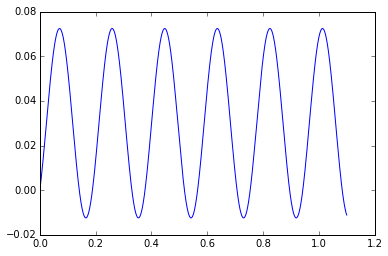

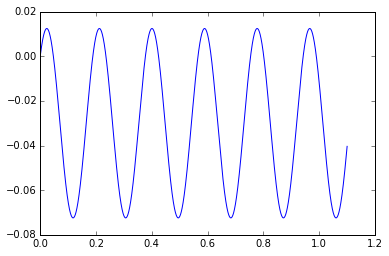

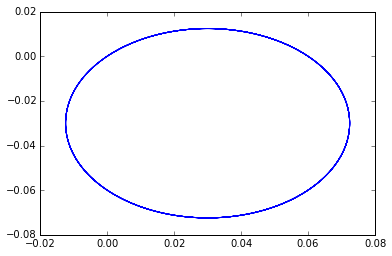

In [77]:
def travel(particle):
    t_array = np.linspace(0, np.min([particle.lifetime(),1000]),10000)
    particle_path = scipy.integrate.odeint(path, particle.array(), t_array)
    particle.set_pos(particle_path[:,0], particle_path[:,2], particle_path[:,4])
    particle.set_v(particle_path[:,1], particle_path[:,3], particle_path[:,5])

D_plus = Particle('D+',3.0,1,110)
D_plus.set_pos([0],[0],[0])
D_plus.set_v([.01],[.01],[.01])
travel(D_plus)

plt.plot(D_plus.x(),D_plus.y())
plt.show()
plt.plot(D_plus.x(),D_plus.z())
plt.show()
plt.plot(D_plus.y(),D_plus.z())
plt.show()

In [74]:
mass_dict = {'D0': 1864.84, 'D0_bar': 1864.84, 'D+': 1869.61, 'D-': 1869.61,
             'Ks': 497.611, 'Kl': 497.611, 'K+': 493.677, 'K-': 497.677,
             'pi0': 134.9766, 'pi+': 139.57018, 'pi-': 139.57018,
             'rho': 775.26, 'rho+': 775.26, 'rho-': 775.26,
             'e+': .510999, 'e-': .510999,
             'mu': 105.6584, 'mu+': 105.6584, 'mu-': 105.6584}

# In 10^-15 s
life_dict = {'D0': 410.1, 'D0_bar': 410.1, 'D+': 1040, 'D-': 1040,
             'Ks': 89540, 'Kl': 5.116*10**7 , 'K+': 1.238*10**7, 'K-': 1.238*10**7,
             'pi0': .0852, 'pi+': 2.6033*10**7, 'pi-': 2.6033*10**7,
             'rho': 4.5*10**-9, 'rho+': 4.5*10**-9, 'rho-': 4.5*10**-9,
             'e+': 1*10**100 , 'e-': 1*10**100,
             'mu': 2.197*10**9, 'mu+': 2.197*10**9, 'mu-': 2.197*10**9}
'''
life_dict = {'D0': 410.1, 'D0_bar': 410.1, 'D+': 1040, 'D-': 1040,
             'Ks': 895, 'Kl': 511 , 'K+': 238, 'K-': 238,
             'pi0': 852, 'pi+': 603, 'pi-': 6033,
             'rho': 4.5*10**-9, 'rho+': 4.5*10**-9, 'rho-': 4.5*10**-9,
             'e+': 1*10**100 , 'e-': 1*10**100,
             'mu': 2.197*10**9, 'mu+': 2.197*10**9, 'mu-': 2.197*10**9}'''

"\nlife_dict = {'D0': 410.1, 'D0_bar': 410.1, 'D+': 1040, 'D-': 1040,\n             'Ks': 895, 'Kl': 511 , 'K+': 238, 'K-': 238,\n             'pi0': 852, 'pi+': 603, 'pi-': 6033,\n             'rho': 4.5*10**-9, 'rho+': 4.5*10**-9, 'rho-': 4.5*10**-9,\n             'e+': 1*10**100 , 'e-': 1*10**100,\n             'mu': 2.197*10**9, 'mu+': 2.197*10**9, 'mu-': 2.197*10**9}"

In [75]:
mass_dict['K+']

493.677

In [76]:
def mass_charge_lifetime(particle_name):
    h_bar = 6.58 * 10**-7
    average_mass = mass_dict[str(particle_name)]
    average_life = life_dict[str(particle_name)]
    err_mass = h_bar/average_life
    err_life = h_bar/average_mass
    rand_mass = np.random.standard_cauchy()
    rand_life = np.random.standard_cauchy()
    mass = average_mass + err_mass * rand_mass
    life = average_life + err_life * rand_life
    if '-' in particle_name:
        q = -1
    elif '+' in particle_name:
        q = 1
    else:
        q = 0
    return mass, q, life
    
mass_charge_lifetime('K+')

(493.6769999999999, 1, 12380000.000000002)

In [ ]:
import numpy.testing as test

def particle_class_test():
    D0 = Particle('D0',[0],[0],[0],[.4],[.4],[.4],3.0,0,1.1)
    # Check gamma
    test.assert_almost_equal(1.3867504905639025, D0.gamma())
    # Check particle's velocity
    test.assert_almost_equal(.692820323028, D0.v())
    # Check particle's momentum
    test.assert_almost_equal(2.88230676849,D0.p())
    
    print('Particle Class Tests Passed')

def particle_class_test():
    D0 = Particle('D0',3.0,0,1.1)
    D0.set_v([.4],[.4],[.4])
    # Check gamma
    test.assert_almost_equal(1.3867504905639025, D0.gamma())
    # Check particle's velocity
    test.assert_almost_equal(.692820323028, D0.v())
    # Check particle's momentum
    test.assert_almost_equal(2.88230676849,D0.p())
    
    print('Particle Class Tests Passed')
    
particle_class_test()



In [ ]:
def two_body_decay_test():
    D0 = Particle('D0',[1,5],[1,4],[1,8],[.9],[.1],[.01],3.0,0,1.1)
    pi_plus = Particle('pip',[0],[0],[0],[.01],[.01],[.01],.135,1,2.0)
    K_minus = Particle('Km',[0],[0],[0],[.01],[.01],[.01],1.3,-1,3.0)

    D0, pi_plus, K_minus = two_body_decay(D0,pi_plus,K_minus)
    
    # Check for equal momenta
    test.assert_almost_equal(pi_plus.p(), K_minus.p())
    # Check for correct initial position
    test.assert_almost_equal(pi_plus.x()[0], K_minus.x()[0], D0.x()[-1])
    test.assert_almost_equal(pi_plus.y()[0], K_minus.y()[0], D0.y()[-1])
    test.assert_almost_equal(pi_plus.z()[0], K_minus.z()[0], D0.z()[-1])
    # Check for correct energy
    test.assert_almost_equal(pi_plus.e(), 1.2213708333)
    test.assert_almost_equal(K_minus.e(), 1.7786291667)
    
    print(pi_plus)
    print(K_minus)
    print('Two Body Decay Tests Passed')
    
    
two_body_decay_test()

In [ ]:
def neutral_particle_path_test():
    D0 = Particle('D0',[0],[0],[0],[.9],[.5],[.4],3.0,0,1.1)
    t_array = np.linspace(0,10,100)
    D0_path = scipy.integrate.odeint(path, D0.array(), t_array)
    # Check final position
    test.assert_almost_equal(9,D0_path[-1,0])
    test.assert_almost_equal(5,D0_path[-1,2])
    test.assert_almost_equal(4,D0_path[-1,4])
    # Check final velocity
    test.assert_almost_equal(.9,D0_path[-1,1])
    test.assert_almost_equal(.5,D0_path[-1,3])
    test.assert_almost_equal(.4,D0_path[-1,5])
    
    print('Neutral Particle Path tests passed')
    
neutral_particle_path_test()

def charged_particle_path_test():
    D_plus = Particle('D+',[0],[0],[0],[.9],[.5],[.4],3.0,1,1.1)
    t_array = np.linspace(0,10,100)
    D_plus_path = scipy.integrate.odeint(path, D_plus.array(), t_array)
    # Check final position
    test.assert_almost_equal(9,D_plus_path[-1,0])
    test.assert_almost_equal(5,D_plus_path[-1,2])
    test.assert_almost_equal(4,D_plus_path[-1,4])
    # Check final velocity
    test.assert_almost_equal(.9,D_plus_path[-1,1])
    test.assert_almost_equal(.5,D_plus_path[-1,3])
    test.assert_almost_equal(.4,D_plus_path[-1,5])
    
    print('Charged Particle Path tests passed')

charged_particle_path_test()

In [ ]:
def run_all_tests():
    particle_class_test()
    two_body_decay_test()
    neutral_particle_path_test()
    charged_particle_path_test()
    
run_all_tests()

# Particle class, Two body decay, and Neutral particle paths work
# Charged particle path does not